## Demonstrate emergent property of ensembles - uncovering different structure types than parent algorithm

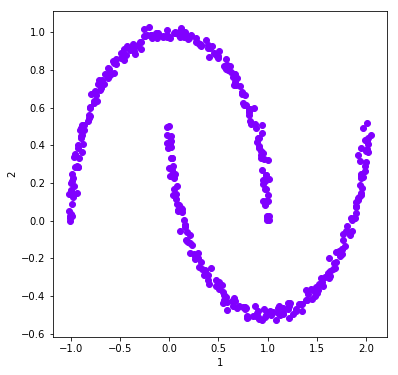

In [1]:
# Reproduce Ana Fred's Majority voting solution to stabilizing KMeans clustering using OpenEnsembles
# This example demonstrates how an ensemble of kmeans solutions, which are constrained to finding spheroids
# can identify contigous structres
import pandas as pd 
import random
import matplotlib.pyplot as plt
from sklearn import datasets
import openensembles as oe


n_samples = 400
X, y = datasets.make_moons(n_samples=n_samples, shuffle=True, noise=0.02, random_state=None)
df = pd.DataFrame(X)

dataObj = oe.data(df, [1,2])
dataObj.plot_data('parent')



## Example of using OpenEnsembles to create and visualize a single solution

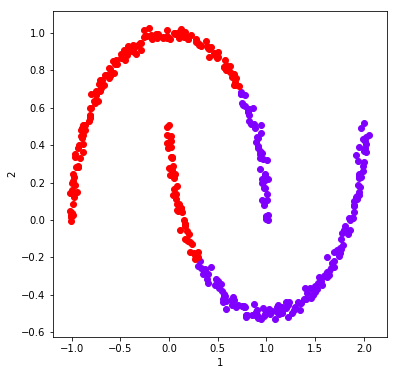

In [2]:
#Plot a single solution 
# default Scikit-learn settings have built in some determinism using Ana Fred's principals, so we have to override those

c = oe.cluster(dataObj) 
K = 2
name = 'kmeans'
c.cluster('parent', 'kmeans', name, K, init = 'random', n_init = 1)
dataObj.plot_data('parent', class_labels=c.labels['kmeans'])


## Create an ensemble of kmeans, plot convergence towards solution

In [3]:
# Build towards a majority voting that finds the two continuous partitions
c = oe.cluster(dataObj) 
K = 10 
numIterations = 40
c_MV_arr = []
fig_arr = []
modulo = 1
sil_arr = []
det_arr = []
num_clusters = []

for i in range(1,numIterations):
    name = 'kmeans_' + str(i)
    c.cluster('parent', 'kmeans', name, K, init = 'random', n_init = 1)
    if not i % modulo:
        x = c.finish_majority_vote(threshold=0.5)
        c_MV_arr.append(x)
        num_clusters.append(len(x.clusterNumbers['majority_vote']))
        v = oe.validation(dataObj, x)
        
        #A compactness metric
        validation_name = 'silhouette'
        v.calculate(validation_name, 'majority_vote', 'parent')
        name = validation_name+'_parent_majority_vote'
        sil_arr.append(v.validation[name])

        #A metric for connectedness
        validation_name = 'det_ratio'
        v.calculate(validation_name, 'majority_vote', 'parent')
        name = validation_name+'_parent_majority_vote'
        det_arr.append(v.validation[name])

#        fig_arr.append(dataObj.plot_data('parent', class_labels=c_MV_arr[-1].labels['majority_vote']))
    #add the calculation of two metrics using the solution -- one that awards contiguousness and one that awards compactness
        
        

/Users/knaegle/anaconda/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/Users/knaegle/anaconda/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


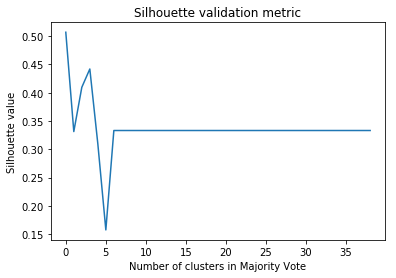

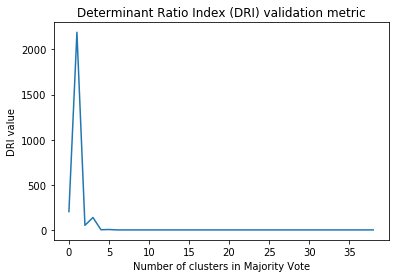

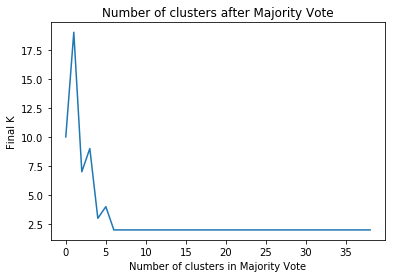

In [5]:
#Compactness
plt.plot(sil_arr)
plt.title('Silhouette validation metric')
plt.xlabel('Number of clusters in Majority Vote')
plt.ylabel('Silhouette value')
plt.show()

#Connectedness
plt.plot(det_arr)
plt.title('Determinant Ratio Index (DRI) validation metric')
plt.xlabel('Number of clusters in Majority Vote')
plt.ylabel('DRI value')
plt.show()

#Convergence towards final K
plt.plot(num_clusters)
plt.xlabel('Number of clusters in Majority Vote')
plt.ylabel('Final K')
plt.title('Number of clusters after Majority Vote')
plt.show()

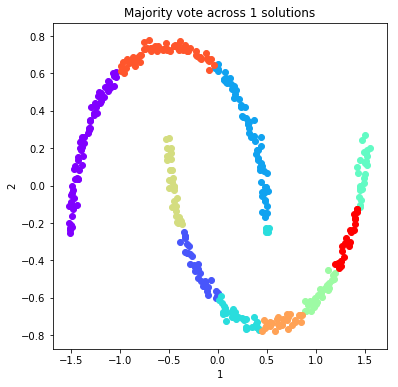

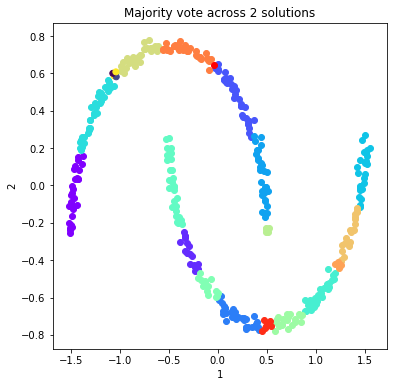

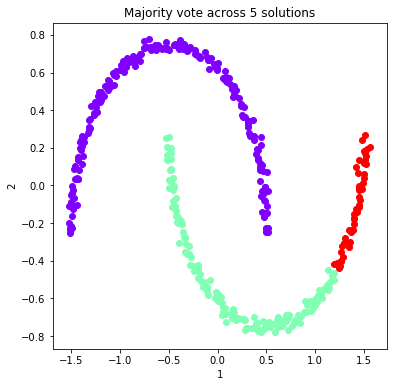

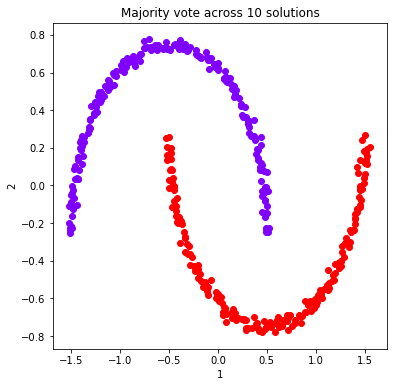

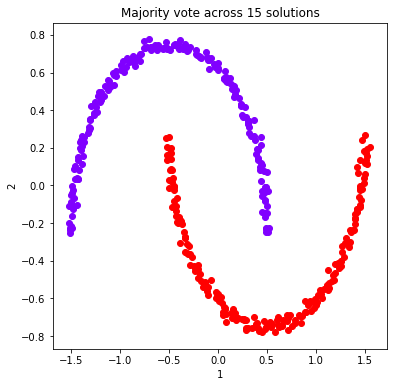

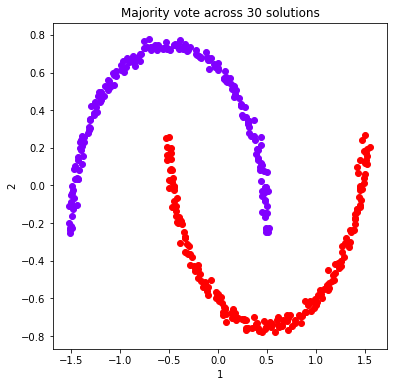

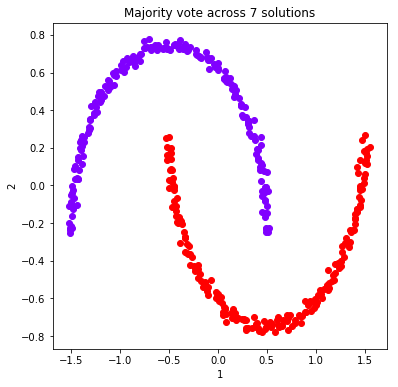

In [6]:
# Plot some span of solutoins, including the one that minimizes connectedness 
import operator
idx, value = min(enumerate(det_arr), key=operator.itemgetter(1)) #Where the connectedness metric minimized

toPlot = [0, 1, 4, 9, 14, 29, idx]
for ind in toPlot:

    fig = dataObj.plot_data('parent', class_labels=c_MV_arr[ind].labels['majority_vote'])
    plt.title('Majority vote across %d solutions'%(ind+1))
    plt.show()
